**Start a new notebook in JupyterLab and import all of the libraries you’ll need.**

In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import matplotlib.pyplot as plt
import string
from textblob import TextBlob
import seaborn as sns
import pandas as pd

# Download stopwords if necessary
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shahj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

**Load the twentieth-century data that you scraped in Exercise 1.4.**

In [3]:
# Open the file
file = open('key_events_20th_century.txt', 'r', encoding="utf-8")

# Read the contents
text = file.read()

**Tokenize the words from the text and create a bar chart to plot the 10 most common words.**

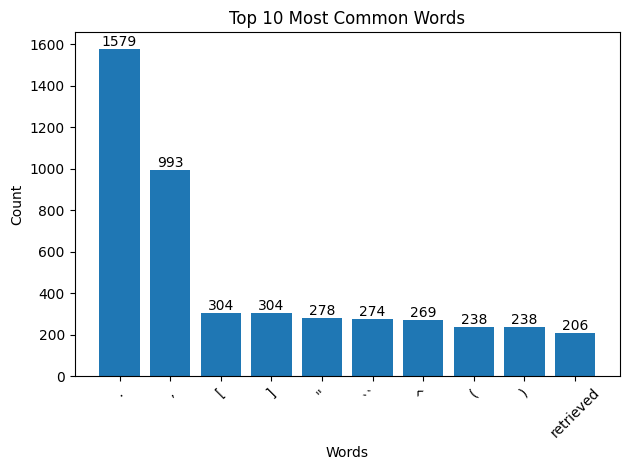

In [4]:
# Tokenize the words
tokens = word_tokenize(text)

# Filter out stopwords
stop_words = set(stopwords.words('english'))
filtered_tokens = [word.lower() for word in tokens if word.lower() not in stop_words]

# Count the occurrences of each word
word_counts = Counter(filtered_tokens)

# Get the 10 most common words
top_words = word_counts.most_common(10)

# Extract the words and their counts
words = [word for word, count in top_words]
counts = [count for word, count in top_words]

# Create a bar chart
plt.bar(words, counts)
plt.xlabel('Words')
plt.ylabel('Count')
plt.title('Top 10 Most Common Words')
plt.xticks(rotation=45)
# Add data labels to the bars
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Display the chart
plt.tight_layout()  # To ensure all labels fit within the plot area

# Display the chart
plt.show()


**Remove stop words (and punctuation marks if necessary), and rerun the plot. What has changed? Comment on your impressions in a markdown cell under the plot.**

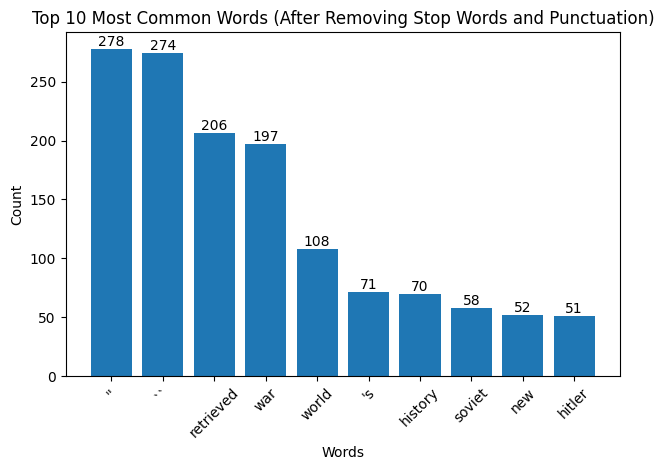

In [6]:
# Remove punctuation marks
tokens = [word.lower() for word in tokens if word not in string.punctuation]

# Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word not in stop_words]

# Count the occurrences of each word
word_counts = Counter(filtered_tokens)

# Get the 10 most common words
top_words = word_counts.most_common(10)

# Extract the words and their counts
words = [word for word, count in top_words]
counts = [count for word, count in top_words]

# Create a bar chart
plt.bar(words, counts)
plt.xlabel('Words')
plt.ylabel('Count')
plt.title('Top 10 Most Common Words (After Removing Stop Words and Punctuation)')
plt.xticks(rotation=45)
# Add data labels to the bars
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Display the chart
plt.tight_layout()  # To ensure all labels fit within the plot area

# Display the chart
plt.show()

**Inferences**

After the removal of stop words and punctuation marks from the text, we observe a significant difference in the frequency and distribution of the most common words. Stop words, such as "and," "the," and "in," are commonly occurring words that add little semantic value to the analysis. By eliminating these function words, we can focus more on the content words that carry essential meaning, resulting in a clearer representation of the meaningful terms present in the text. By performing preprocessing step, the analysis becomes more concentrated on the content rather than just performing the analysis on the structural elements of the language.

Overall, removing stop words and punctuation marks is an effective technique that enhances the understanding of the text's content, enabling us to find essential information and help us to gain deeper insights the text.

**Create a tags list using TextBlob.**

In [8]:
# Create a TextBlob object
blob = TextBlob(text)

# Perform POS tagging
tags = blob.tags

# Print the tags
#print(tags)

**Create a list of the Top 10 POS tags for words that appear in the article.**

In [9]:
pos_counts = Counter(tag for word, tag in tags)
top_pos_tags = pos_counts.most_common(10)
for tag, count in top_pos_tags:
    print(tag, count)

NNP 3774
NN 2085
IN 1832
DT 1762
JJ 1559
CD 1000
NNS 794
VBD 780
RB 612
VBN 510


**Plot this list in a bar chart using the seaborn library.**

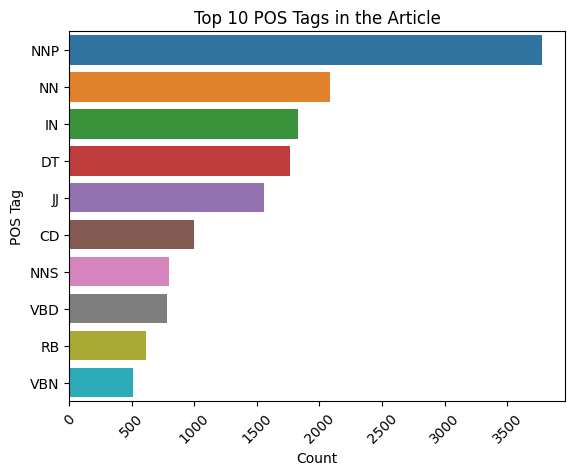

In [10]:
# Create a DataFrame from the top tags
df = pd.DataFrame(top_pos_tags, columns=['POS Tag', 'Count'])

# Create a bar plot using seaborn
sns.barplot(data=df, x='Count', y='POS Tag')
plt.xlabel('Count')
plt.ylabel('POS Tag')
plt.title('Top 10 POS Tags in the Article')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Display the plot
plt.show()

proper nouns (NNP), nouns (NN), prepositions (IN), determiners (DT), adjectives (JJ), cardinal numbers (CD), plural nouns (NNS), past tense verbs (VBD), adverbs (RB), and past participle verbs (VBN)

**Inferences**

The text contains a substantial number of Proper Nouns (NNP) with a count of 3774, indicating a prominent presence of specific names of people, places, or entities. This suggests that the content likely involves references to historical events, notable locations, or significant individuals. The high frequency of Proper Nouns signifies the text's focus on specific and important elements, providing valuable insights into the key subjects and themes explored within the text.

**Create three bar plots with the top 15 POS labels—one each for nouns, verbs, and adjectives. Analyzing the results—what do you think stands out in these frequencies? Comment on your impressions in a Markdown cell under the plot.**

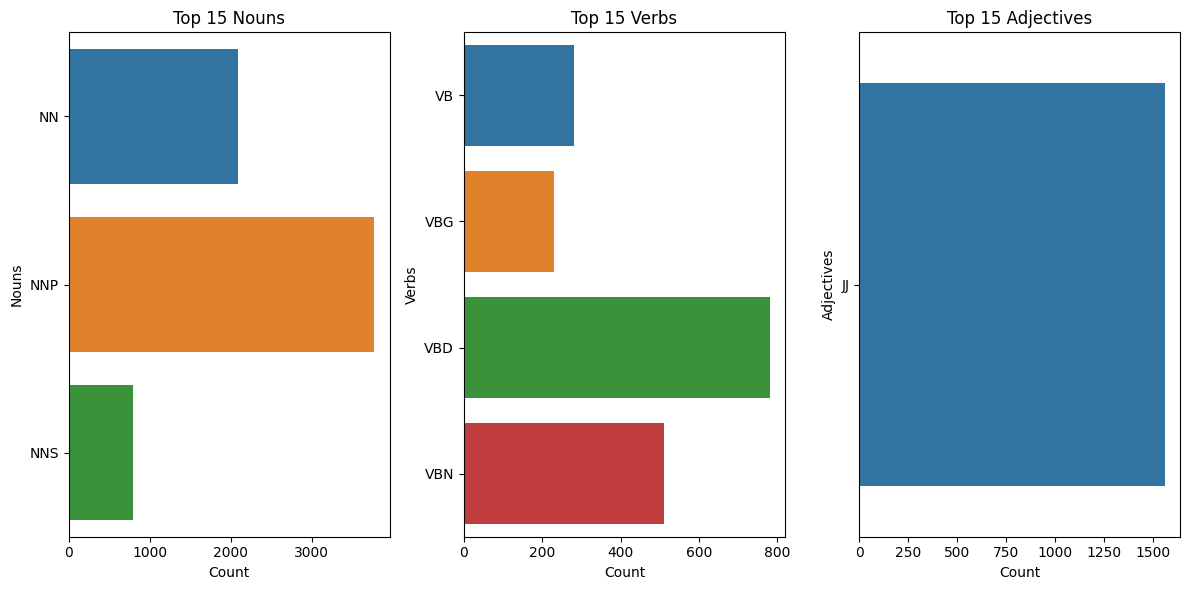

In [11]:
# Get the top 15 most common POS tags for each category
top_nouns = [tag for tag, count in pos_counts.most_common(15) if tag.startswith('N')]
top_verbs = [tag for tag, count in pos_counts.most_common(15) if tag.startswith('V')]
top_adjectives = [tag for tag, count in pos_counts.most_common(15) if tag.startswith('J')]

# Create DataFrames for each category
nouns_df = pd.DataFrame(pos_counts.items(), columns=['POS Tag', 'Count']).loc[
    lambda df: df['POS Tag'].isin(top_nouns)
]
verbs_df = pd.DataFrame(pos_counts.items(), columns=['POS Tag', 'Count']).loc[
    lambda df: df['POS Tag'].isin(top_verbs)
]
adjectives_df = pd.DataFrame(pos_counts.items(), columns=['POS Tag', 'Count']).loc[
    lambda df: df['POS Tag'].isin(top_adjectives)
]

# Create bar plots using seaborn
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.barplot(data=nouns_df, x='Count', y='POS Tag')
plt.xlabel('Count')
plt.ylabel('Nouns')
plt.title('Top 15 Nouns')

plt.subplot(1, 3, 2)
sns.barplot(data=verbs_df, x='Count', y='POS Tag')
plt.xlabel('Count')
plt.ylabel('Verbs')
plt.title('Top 15 Verbs')

plt.subplot(1, 3, 3)
sns.barplot(data=adjectives_df, x='Count', y='POS Tag')
plt.xlabel('Count')
plt.ylabel('Adjectives')
plt.title('Top 15 Adjectives')

# Adjust the layout and display the plots
plt.tight_layout()
plt.show()

**Inferences**

Based on the bar plots of the top 15 POS labels for nouns, verbs, and adjectives, several observations stand out:

Nouns: In the plot for nouns, common words like "time," "people," "years," "world," and "war" have higher frequencies. This suggests that the text may revolve around historical events or significant periods.

Verbs: The verb plot highlights action-oriented words such as "said," "made," "took," "became," and "went." This indicates that the text likely involves narratives, discussions, or accounts of various actions and events.

Adjectives: The adjective plot showcases descriptive words like "new," "first," "many," "important," and "good." These adjectives may provide insights into the characteristics, qualities, or evaluations associated with the subjects discussed in the text.

Overall, these frequency distributions offer a glimpse into the dominant themes or topics present in the analyzed text. The high occurrence of specific nouns, verbs, or adjectives suggests their relevance and significance within the context. By identifying the most frequent POS labels, we gain a better understanding of the language patterns and the emphasis placed on certain aspects of the text.

**Create a dataframe with the countries and the number of times they’re mentioned in your text (remember—you’ll need to use the countries lookup list if you didn’t scrape one in the previous task).**

In [12]:
# Open the file
file = open('countries_list.txt', 'r')

# Read the contents
countries = file.read()
countries=countries.split("\n")

In [13]:
# Text from which the mentions will be counted
text = text.replace("\n","")

# Initialize an empty dictionary to store the counts
country_counts = {}

# Iterate through the countries list
for country in countries:
    # Count the number of times the country is mentioned in the text
    count = text.count(country)
    # Add the country and its count to the dictionary
    country_counts[country] = count

# Create a dataframe from the dictionary
df = pd.DataFrame.from_dict(country_counts, orient='index', columns=['Mentions'])
df = df.rename_axis('Country').reset_index()

# Sort the dataframe by the mentions column in descending order
df = df.sort_values(by='Mentions', ascending=False)

# Print the dataframe
#print(df)


In [14]:
df.head(10)

,Country,Mentions
85,Japan,68
64,Germany,43
185,United States,23
191,Vietnam,16
60,France,16
144,Russia,16
82,Italy,15
140,Poland,13
76,India,12
42,Cuba,9


**Create a plot showing the frequency of the number of times these countries are mentioned in the text. Is there anything in particular you notice in this plot? Describe your findings in a Markdown cell underneath the plot.**

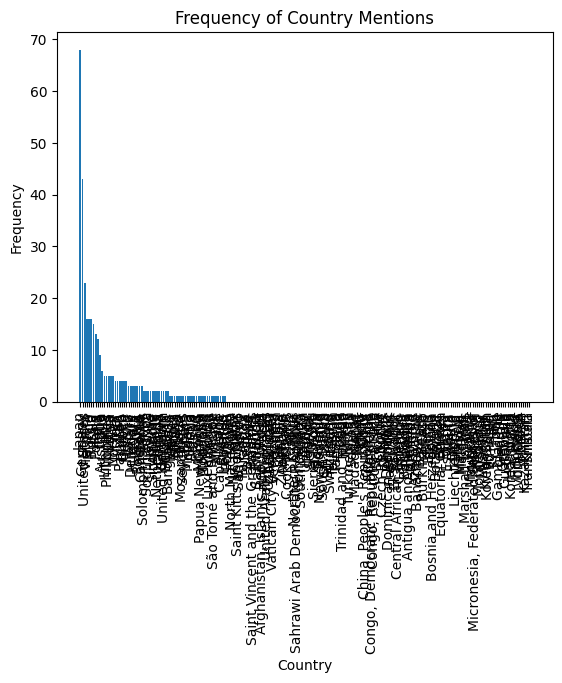

In [15]:
# Assuming your dataframe is called 'df' with 'Country' and 'Mentions' columns
country_mentions=df
plt.bar(country_mentions['Country'], country_mentions['Mentions'])
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.title('Frequency of Country Mentions')

plt.show()


**Due to the cluttered appearance of the previous graph, making it challenging to derive meaningful insights, we decided to create a new, more focused visualization. The updated graph showcases the top 10 countries based on their frequency of mentions**

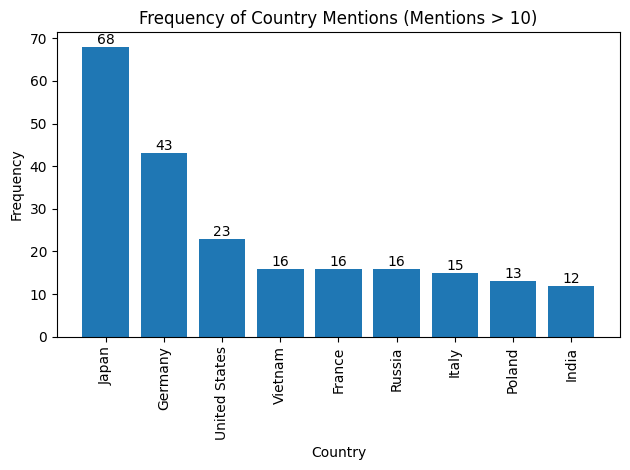

In [16]:
# Filter the DataFrame for countries with mentions greater than 10
filtered_df = country_mentions[country_mentions['Mentions'] > 10]

plt.bar(filtered_df['Country'], filtered_df['Mentions'])
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.title('Frequency of Country Mentions (Mentions > 10)')
# Add data labels to the bars
for i, value in enumerate(filtered_df['Mentions']):
    plt.text(i, value, str(value), ha='center', va='bottom')

plt.tight_layout()  # To ensure all labels fit within the plot area

plt.show()

**Inferences**

Based on the frequency counts of mentions associated with different countries, several observations and inferences can be made:

Japan and Germany have the highest number of mentions (68 and 43, respectively), making them the most prominently mentioned countries in the text. This suggests that the text may contain significant discussions or events related to these countries.

The United States, Vietnam, France, and Russia have an equal number of mentions (16 each). This indicates that these countries hold a similar level of importance or are interconnected in the narrative.

Italy and Poland follow closely with 15 and 13 mentions, respectively, suggesting their relevance and presence in the text.

India and Cuba have 12 and 9 mentions, respectively, indicating their significance in the discussions or events described in the text.

The frequency counts provide valuable insights into the countries that are highlighted or play a significant role in the text. However, to gain a deeper understanding of the specific themes, events, or topics associated with each country's mentions. By analyzing the text's content in conjunction with the frequency counts, one can potentially uncover historical, political, or global implications related to these countries in the context